In [9]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Create a quantum device with 7 qubits and 1024 shots
dev = qml.device("default.qubit", wires=7, shots=1024)

@qml.qnode(dev)
def full_adder(inputs):
    """Full Adder using CNOT, Toffoli, and ancilla qubits."""
    # Prepare initial state based on input bits (A, B, Cin)
    for i, bit in enumerate(inputs):
        if bit == 1:
            qml.PauliX(wires=i)
    
    # First, compute A AND B and store it on ancilla (wire 5)
    qml.Toffoli(wires=[0, 1, 5])  # This uses the original A and B
    
    # Next, compute A ⊕ B and store it on wire 1 (overwriting B)
    qml.CNOT(wires=[0, 1])
    
    # Compute (A ⊕ B) AND Cin and store it on ancilla (wire 6)
    qml.Toffoli(wires=[1, 2, 6])
    
    # Compute final carry-out: Cout = (A ⋅ B) ⊕ (Cin ⋅ (A ⊕ B)) on wire 4
    qml.CNOT(wires=[5, 4])
    qml.CNOT(wires=[6, 4])
    
    # Compute sum: Sum = (A ⊕ B) ⊕ Cin on wire 1
    qml.CNOT(wires=[2, 1])
    
    # Measure Sum and Cout
    return qml.sample(wires=[1, 4])

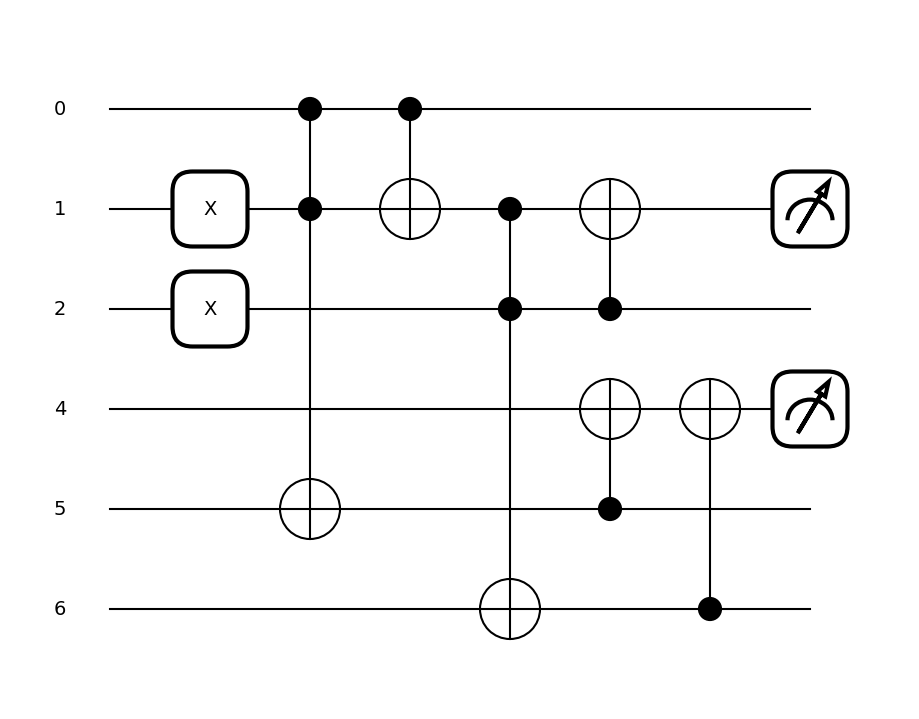

In [10]:
# Visualize the circuit
inputs = [0, 1, 1]
qml.draw_mpl(full_adder)(inputs)
plt.show()

Counts: {'01': 1024}


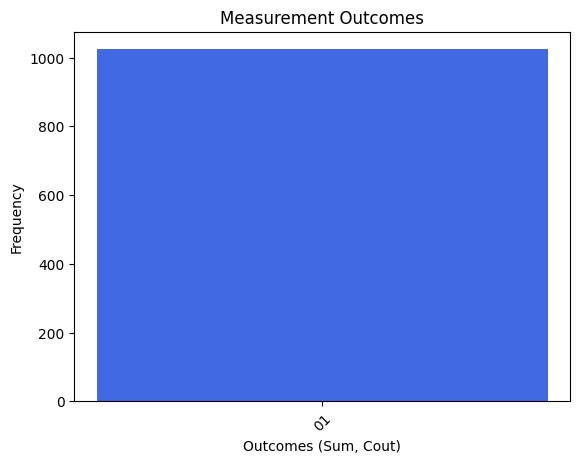

In [11]:
# Run the circuit and collect results
result = full_adder(inputs)

# Convert samples to counts
def get_counts(result):
    counts = {}
    for sample in result:
        outcome = "".join(map(str, sample))
        counts[outcome] = counts.get(outcome, 0) + 1
    return counts

counts = get_counts(result)
print("Counts:", counts)

# Plot histogram
def plot_histogram(counts):
    labels = list(counts.keys())
    values = list(counts.values())
    plt.bar(labels, values, color='royalblue')
    plt.xlabel("Outcomes (Sum, Cout)")
    plt.ylabel("Frequency")
    plt.title("Measurement Outcomes")
    plt.xticks(rotation=45)
    plt.show()

plot_histogram(counts)

In [12]:
from scipy.stats import mode

# Full Adder Truth Table: (A, B, Cin) -> (Sum, Cout)
truth_table = {
    (0, 0, 0): (0, 0),
    (0, 0, 1): (1, 0),
    (0, 1, 0): (1, 0),
    (0, 1, 1): (0, 1),
    (1, 0, 0): (1, 0),
    (1, 0, 1): (0, 1),
    (1, 1, 0): (0, 1),
    (1, 1, 1): (1, 1),
}

def test_full_adder():
    passed = True
    for inputs, expected_output in truth_table.items():
        # Run the circuit and collect samples
        result = full_adder(inputs)
        
        # Calculate the mode (most frequent value) for Sum and Cout
        sum_mode = mode(result[:, 0], keepdims=True).mode[0]
        cout_mode = mode(result[:, 1], keepdims=True).mode[0]

        actual_output = (sum_mode, cout_mode)
        
        if actual_output != expected_output:
            print(f"Test failed for inputs {inputs}. Expected: {expected_output}, Got: {actual_output}")
            passed = False
        else:
            print(f"Test passed for inputs {inputs}. Output: {actual_output}")

    if passed:
        print("\nAll tests passed!")

# Run the test
test_full_adder()


Test passed for inputs (0, 0, 0). Output: (np.int64(0), np.int64(0))
Test passed for inputs (0, 0, 1). Output: (np.int64(1), np.int64(0))
Test passed for inputs (0, 1, 0). Output: (np.int64(1), np.int64(0))
Test passed for inputs (0, 1, 1). Output: (np.int64(0), np.int64(1))
Test passed for inputs (1, 0, 0). Output: (np.int64(1), np.int64(0))
Test passed for inputs (1, 0, 1). Output: (np.int64(0), np.int64(1))
Test passed for inputs (1, 1, 0). Output: (np.int64(0), np.int64(1))
Test passed for inputs (1, 1, 1). Output: (np.int64(1), np.int64(1))

All tests passed!


In [13]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Create a quantum device with 7 qubits and 1024 shots
dev = qml.device("default.qubit", wires=7, shots=1024)

@qml.qnode(dev)
def full_adder(inputs):
    """Full Adder using CNOT, Toffoli, and ancilla qubits.
    
    The input bits (A, B, Cin) can be:
      - 0  (prepare |0⟩),
      - 1  (prepare |1⟩), or
      - '+' (prepare |+⟩ by applying a Hadamard gate).
    """
    # Prepare initial state based on input bits (A, B, Cin)
    for i, bit in enumerate(inputs):
        if bit == '+':
            qml.Hadamard(wires=i)
        elif bit == 1:
            qml.PauliX(wires=i)
        # If the bit is 0, do nothing (|0⟩ is the default state)
    
    # First, compute A AND B and store it on ancilla (wire 5)
    qml.Toffoli(wires=[0, 1, 5])
    
    # Next, compute A ⊕ B and store it on wire 1 (overwriting B)
    qml.CNOT(wires=[0, 1])
    
    # Compute (A ⊕ B) AND Cin and store it on ancilla (wire 6)
    qml.Toffoli(wires=[1, 2, 6])
    
    # Compute final carry-out: Cout = (A ⋅ B) ⊕ (Cin ⋅ (A ⊕ B)) on wire 4
    qml.CNOT(wires=[5, 4])
    qml.CNOT(wires=[6, 4])
    
    # Compute sum: Sum = (A ⊕ B) ⊕ Cin on wire 1
    qml.CNOT(wires=[2, 1])
    
    # Measure Sum and Cout
    return qml.sample(wires=[1, 4])

Circuit for classical inputs: [0, 1, 1]
(<Figure size 900x700 with 1 Axes>, <Axes: >)


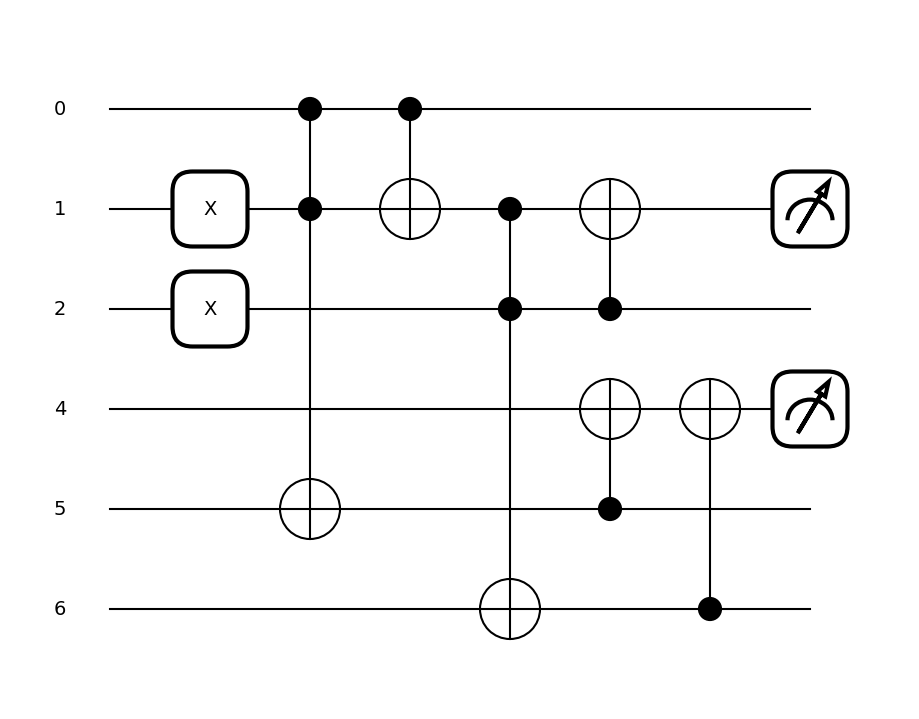

In [14]:
# -------------------------------
# Visualization and Testing
# -------------------------------

# Define two sets of inputs:
# 1. Classical inputs
inputs_classical = [0, 1, 1]
# 2. Superposition inputs: each input is prepared in the |+> state
inputs_superposition = ['+', '+', '+']

# Visualize the circuit for classical inputs
print("Circuit for classical inputs:", inputs_classical)
print(qml.draw_mpl(full_adder)(inputs_classical))
plt.show()

Circuit for superposition inputs: ['+', '+', '+']
(<Figure size 900x700 with 1 Axes>, <Axes: >)


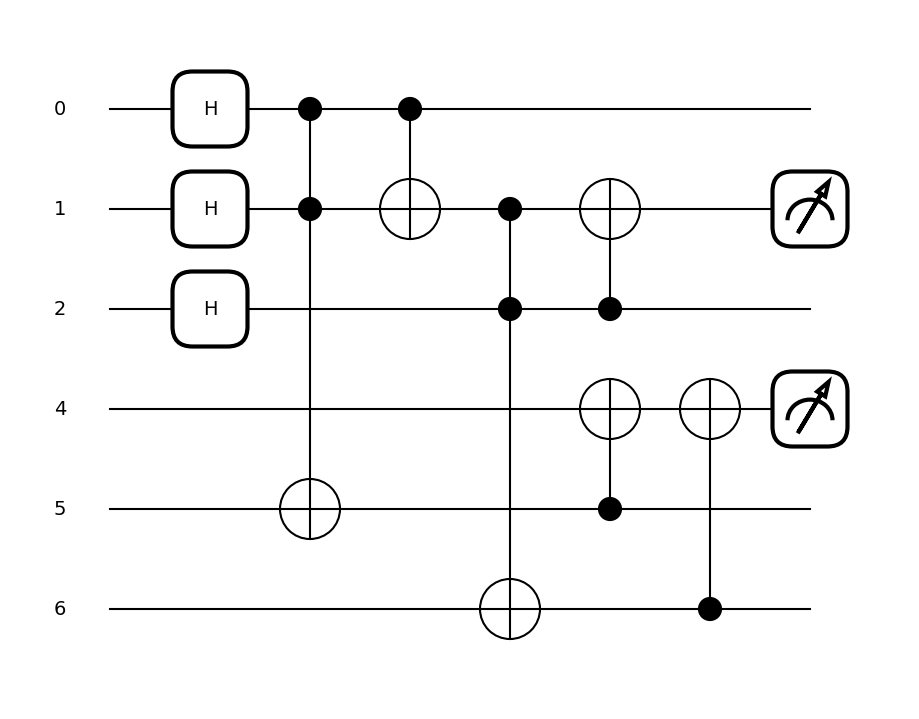

In [15]:
# Visualize the circuit for superposition inputs
print("Circuit for superposition inputs:", inputs_superposition)
print(qml.draw_mpl(full_adder)(inputs_superposition))
plt.show()

Counts (Classical Inputs): {'01': 1024}
Counts (Superposition Inputs): {'00': 121, '11': 141, '10': 371, '01': 391}


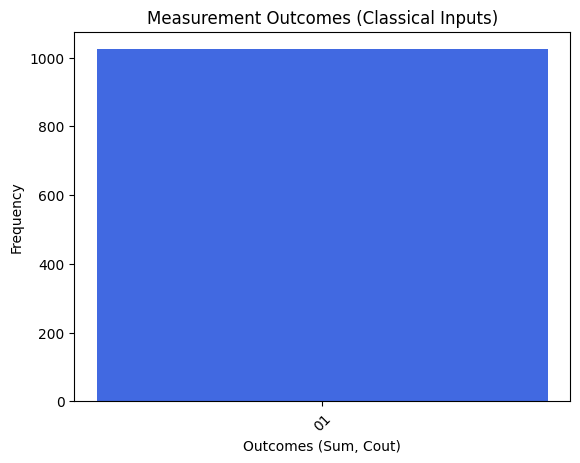

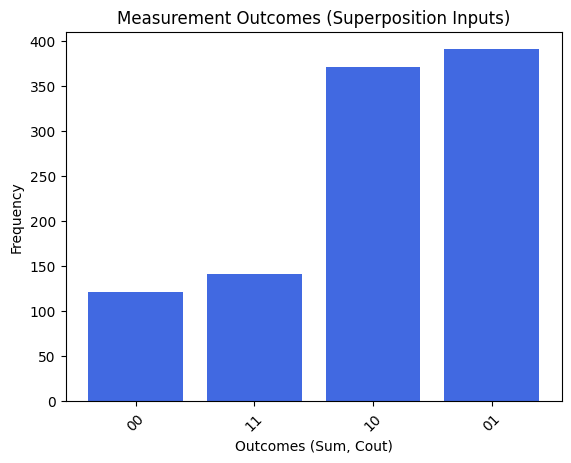

In [16]:
# Run the circuit with classical inputs and collect results
result_classical = full_adder(inputs_classical)

# Run the circuit with superposition inputs and collect results
result_superposition = full_adder(inputs_superposition)

# Convert samples to counts
def get_counts(result):
    counts = {}
    for sample in result:
        outcome = "".join(map(str, sample))
        counts[outcome] = counts.get(outcome, 0) + 1
    return counts

counts_classical = get_counts(result_classical)
counts_superposition = get_counts(result_superposition)

print("Counts (Classical Inputs):", counts_classical)
print("Counts (Superposition Inputs):", counts_superposition)

# Plot histogram for the counts
def plot_histogram(counts, title="Measurement Outcomes"):
    labels = list(counts.keys())
    values = list(counts.values())
    plt.bar(labels, values, color='royalblue')
    plt.xlabel("Outcomes (Sum, Cout)")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_histogram(counts_classical, title="Measurement Outcomes (Classical Inputs)")
plot_histogram(counts_superposition, title="Measurement Outcomes (Superposition Inputs)")